In [70]:
import rasterio as rio
import torchgeo
import torch
from pathlib import  Path
import xarray as xr
import rioxarray as rxr
import matplotlib.pyplot as plt
from torchgeo.datasets import RasterDataset, unbind_samples, stack_samples
from torchgeo.samplers import RandomGeoSampler, Units
from torch.utils.data import DataLoader

In [40]:
root = Path("/ibstorage/anthony/NYS_Wetlands_GHG/")

In [41]:
root

PosixPath('/ibstorage/anthony/NYS_Wetlands_GHG')

In [53]:
img = rxr.open_rasterio(root/'Data/RF_DL_comp/rasters/substack_DL.tif')
mask = rxr.open_rasterio(root/'Data/RF_DL_comp/rasters/nwi_subset_rast.tif')

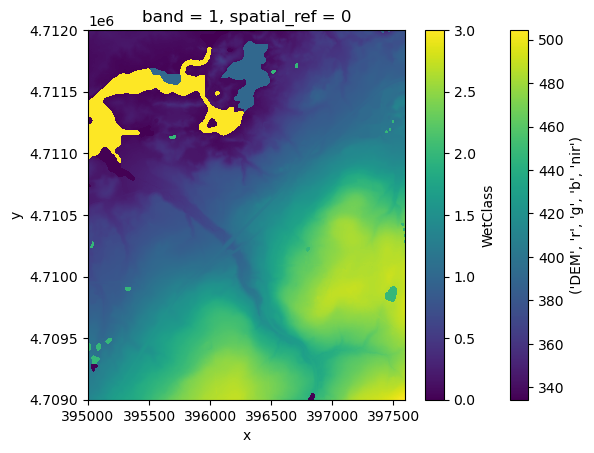

In [54]:
img.sel(band=1).plot()
mask.sel(band=1).plot()

In [44]:
img.rio.crs.to_epsg()

6347

In [62]:
train_ds = RasterDataset(root/'Data/RF_DL_comp/rasters/substack_DL.tif')
train_ds
msk_ds = RasterDataset(root/'Data/RF_DL_comp/rasters/nwi_subset_rast.tif')
msk_ds

In [80]:
msk_ds.is_image = False

In [74]:
sampler = RandomGeoSampler(train_ds, size=(512,512), length=50, units=Units.PIXELS)

In [75]:
torch.manual_seed(0)
bbox = next(iter(sampler))
sample = train_ds[bbox]
print(sample.keys())
print(sample['image'].shape)

dict_keys(['crs', 'bounds', 'image'])
torch.Size([5, 512, 512])


In [83]:
img_sample = train_ds[bbox]
msk_sample = msk_ds[bbox]

print(img_sample.keys(), msk_sample.keys())

dict_keys(['crs', 'bounds', 'image']) dict_keys(['crs', 'bounds', 'mask'])


In [77]:
train_dset = train_ds & msk_ds

In [78]:
train_dset

In [79]:
dataloader = DataLoader(train_dset, sampler=sampler, batch_size=8, collate_fn=stack_samples)
batch = next(iter(dataloader))
batch.keys()

dict_keys(['crs', 'bounds', 'image', 'mask'])

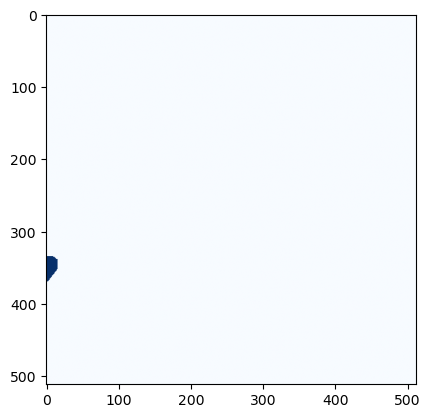

In [91]:
plt.imshow(msk_sample['mask'].squeeze().numpy(), cmap="Blues")